In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


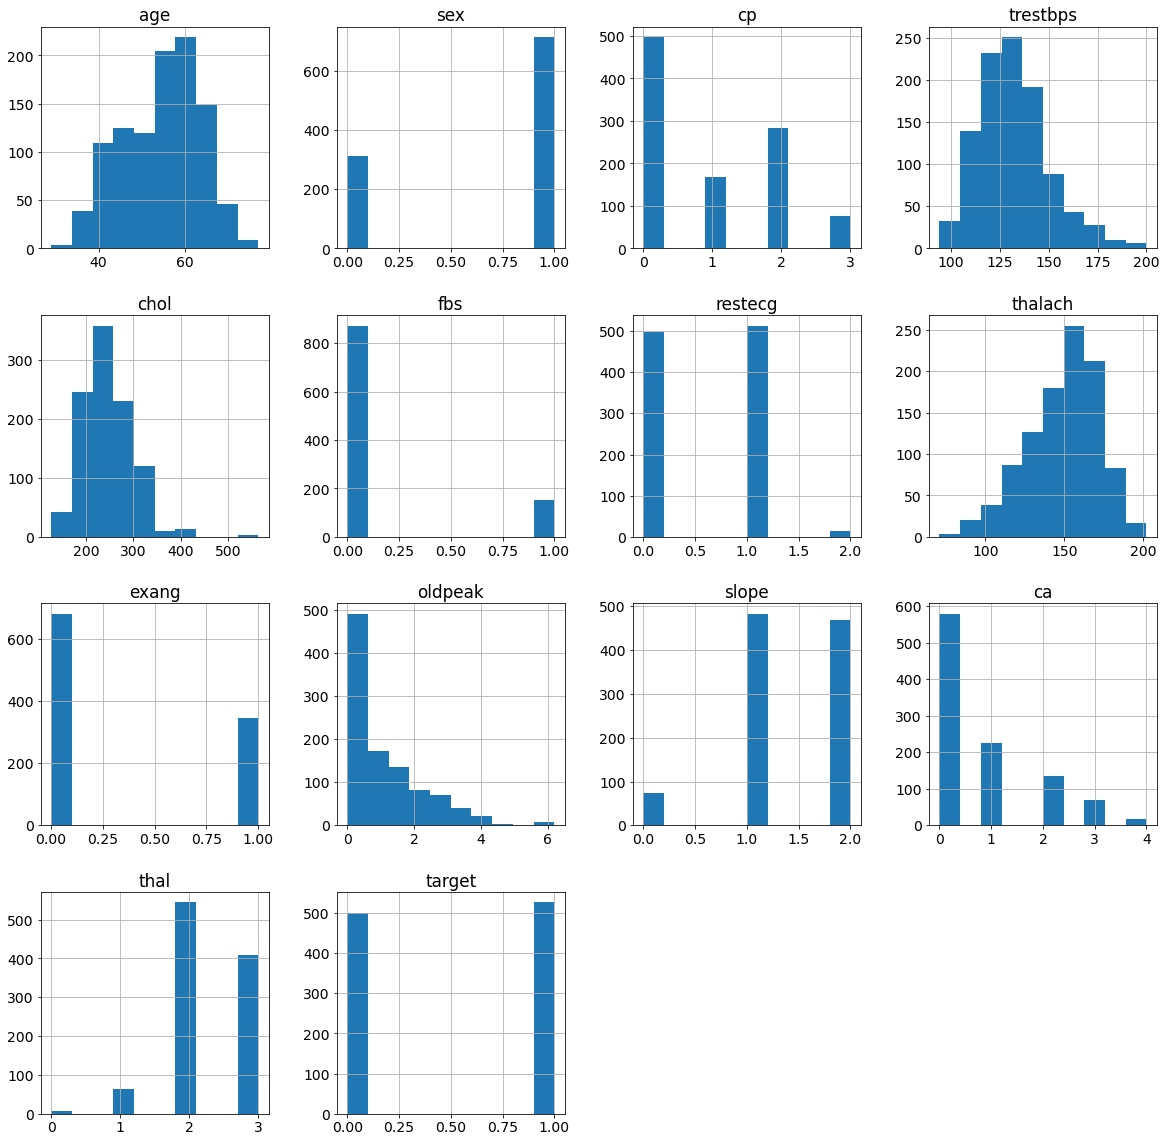

In [4]:
plt.rcParams['figure.figsize'] = [20,20]
plt.rcParams['font.size'] = 14
df.hist();


Text(0.5, 1.0, 'Heart Disease Dirtibution')

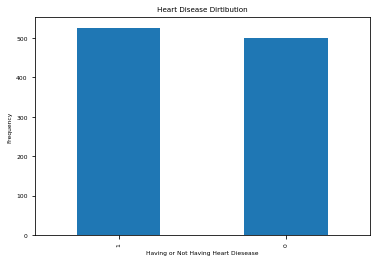

In [5]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['font.size'] = 6
df["target"].value_counts().plot(kind="bar");
plt.xlabel("Having or Not Having Heart Diesease")
plt.ylabel("Frequency");
plt.title("Heart Disease Dirtibution")

In [7]:
X = df.drop(columns="target")
y = df["target"]
print(f"Feature Matrix X shape {X.shape}")
print(f"Target Vector y shape {y.shape}")

Feature Matrix X shape (1025, 13)
Target Vector y shape (1025,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (820, 13)
X_test shape (205, 13)
y_train shape (820,)
y_test shape (205,)


In [56]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [58]:
model = DecisionTreeClassifier(max_depth=6,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [62]:
acc_train_score = accuracy_score(y_train,model.predict(X_train))
acc_val_score = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train_score, 2))
print("Validation Accuracy:", round(acc_val_score, 2))

Training Accuracy: 0.96
Validation Accuracy: 0.9


In [63]:
# Defining Hyperparameter for max_depth
depth_hyperparams = range(1,15,2)

In [65]:
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = DecisionTreeClassifier(max_depth=d,random_state=42)
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.7621951219512195, 0.8582317073170732, 0.9314024390243902]
Validation Accuracy Scores: [0.7621951219512195, 0.8475609756097561, 0.8780487804878049]


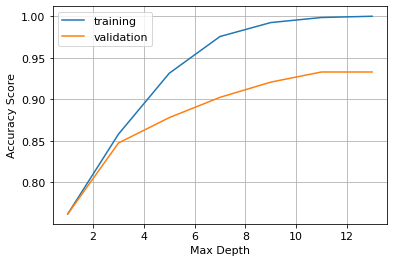

In [69]:
plt.plot(depth_hyperparams,training_acc,label="training")
plt.plot(depth_hyperparams,validation_acc,label="validation")
plt.grid()
plt.rcParams['font.size'] = 11
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

In [70]:
test_acc = model.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.9


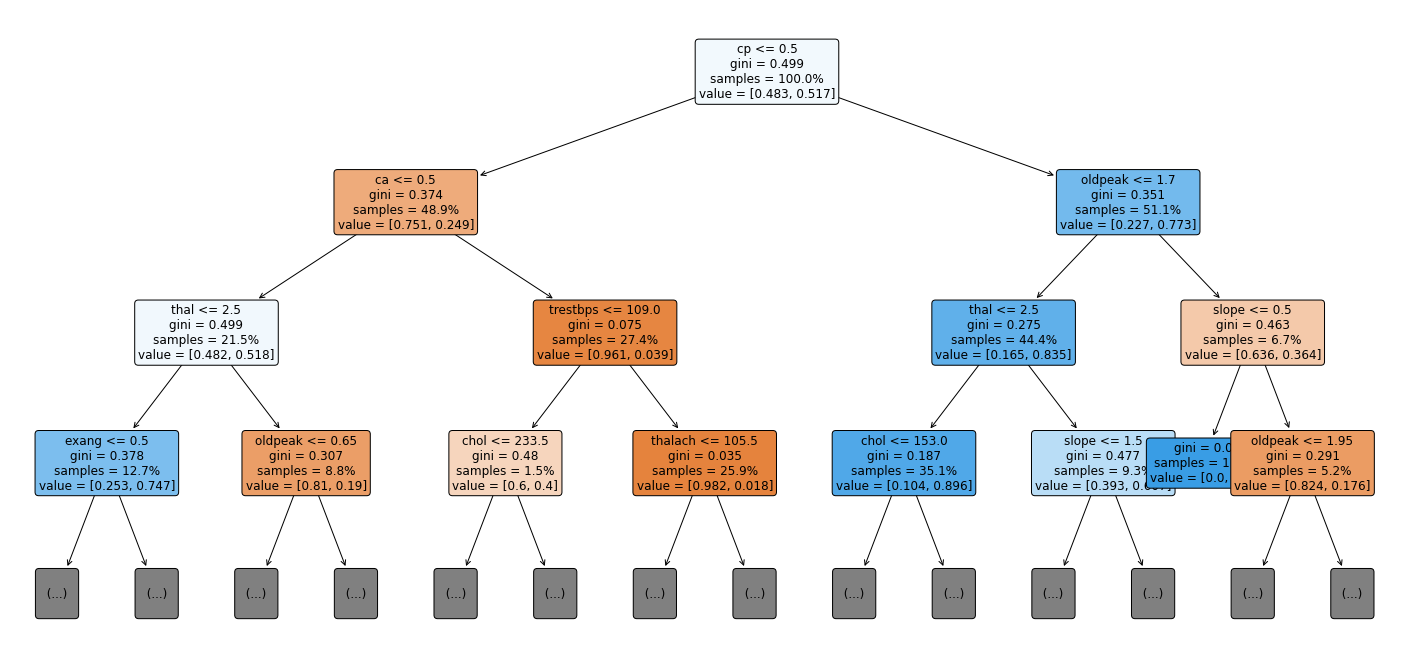

In [81]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model,
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);


In [82]:
features = X_train.columns
importances = model.feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['age', 'sex', 'cp'], dtype='object')
Importances: [1.37544178e-02 2.71642508e-04 3.13043580e-01]


In [83]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.head()

sex        0.000272
fbs        0.002726
age        0.013754
restecg    0.020107
exang      0.024443
dtype: float64

Text(0, 0.5, 'Feature')

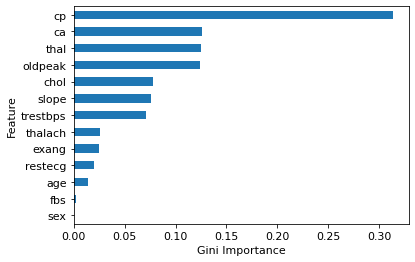

In [84]:
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")